# Radius Neighbors Classifier with MaxAbsScaler and PowerTransformer

This code template facilitates to solve the problem of classification problem using Radius Neighbor Classifier Algorithm using PowerTransformer, MaxAbsScaler techniques.

### Required Packages

In [48]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,MaxAbsScaler,PowerTransformer 
from sklearn.preprocessing import RobustScaler,MaxAbsScaler
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,plot_confusion_matrix 
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [36]:
#filepath
file_path=""

List of features which are  required for model training .

In [37]:
#x_values
features = []

Target feature for prediction.

In [38]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [39]:
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [40]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [41]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [42]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['rest' 'running' 'walking'] to [0, 1, 2]


,pulse,diet_no fat,diet_low fat,time_1 min,time_15 min,time_30 min
0,85,0,1,1,0,0
1,85,0,1,0,1,0
2,88,0,1,0,0,1
3,90,0,1,1,0,0
4,92,0,1,0,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

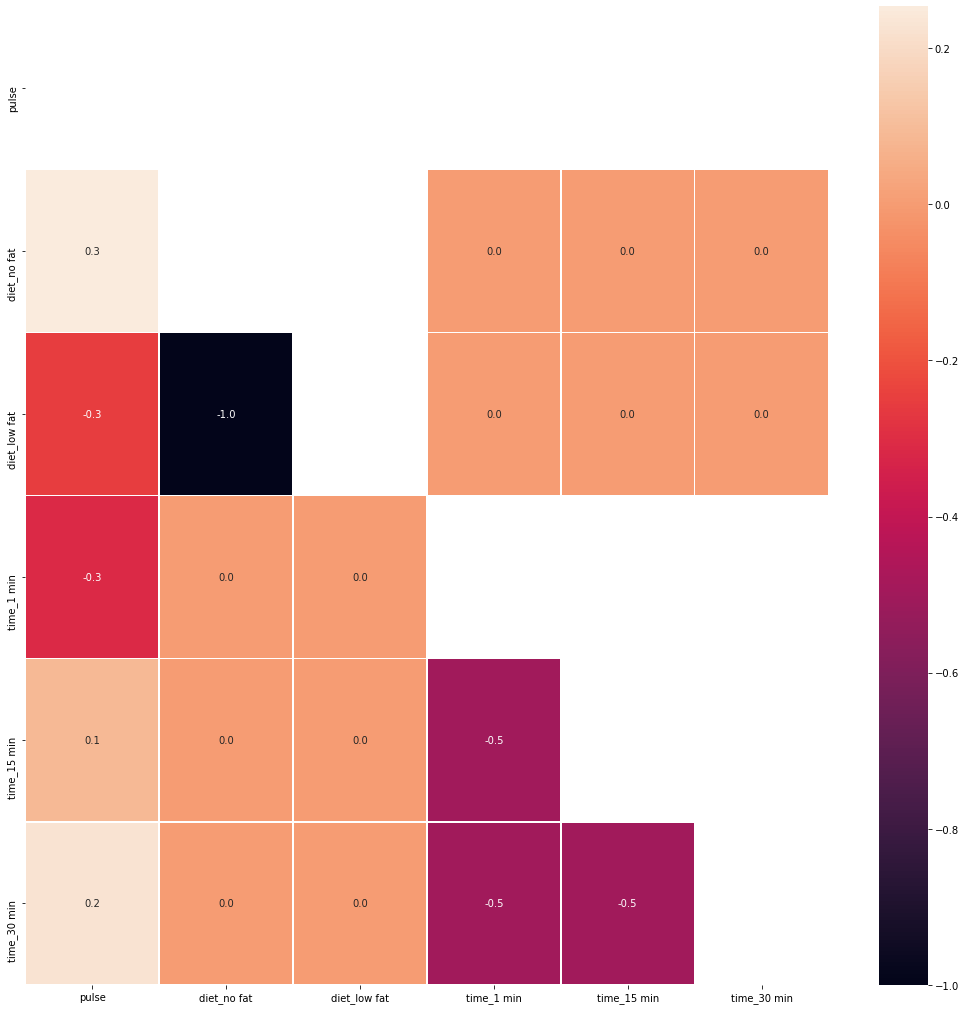

In [43]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

<AxesSubplot:ylabel='count'>

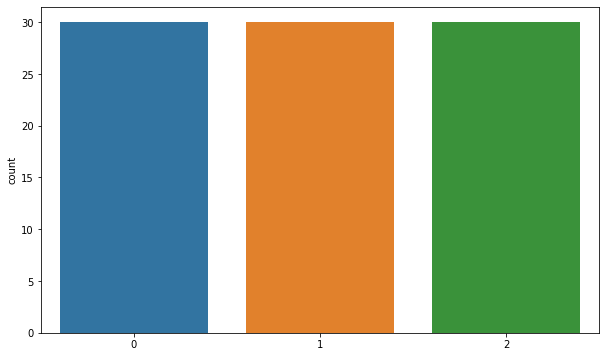

In [44]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [46]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Model
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

#### Model Tuning Parameters

>**radiusfloat, default=1.0**
Range of parameter space to use by default for radius_neighbors queries.

>**weights{‘uniform’, ‘distance’} or callable, default=’uniform’**
weight function used in prediction. Possible values:

>‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

>‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

>[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

>Uniform weights are used by default.

>**algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**
Algorithm used to compute the nearest neighbors:

>‘ball_tree’ will use BallTree

>‘kd_tree’ will use KDTree

>‘brute’ will use a brute-force search.

>‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

>Note: fitting on sparse input will override the setting of this parameter, using brute force.

>**leaf_sizeint, default=30**
>Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

#### PowerTransformer
Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

[PowerTransformer API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

#### MaxAbsScaler
Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


<h4 style="color:orange;">For More Reference :-</h4> 
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html</a>

In [49]:
# Build Model here
model = make_pipeline(MaxAbsScaler(),PowerTransformer(),RadiusNeighborsClassifier())
model.fit(x_train,y_train)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('powertransformer', PowerTransformer()),
                ('radiusneighborsclassifier', RadiusNeighborsClassifier())])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.


In [50]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 27.78 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

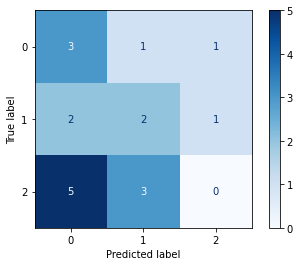

In [51]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [52]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.30      0.60      0.40         5
           1       0.33      0.40      0.36         5
           2       0.00      0.00      0.00         8

    accuracy                           0.28        18
   macro avg       0.21      0.33      0.25        18
weighted avg       0.18      0.28      0.21        18



#### Creator: Jay Shimpi , Github: [Profile](https://github.com/JayShimpi22)